In [1]:
from DataManagement.data_manager import DataManager
from DataManagement.coin_data import CoinData
from TransferEntropy.transfer_entropy import TransferEntropy
from constants import ATR_ABNORMALITY_COLUMN
# libs
import pandas as pd
import numpy as np

# plotting
import seaborn as sn
import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (70,30)

# mutual information
from sklearn.feature_selection import mutual_info_classif

In [2]:
variables = {}
delay = 1
num_of_points = 10000

In [ ]:
x = np.array([])
y = np.array([])

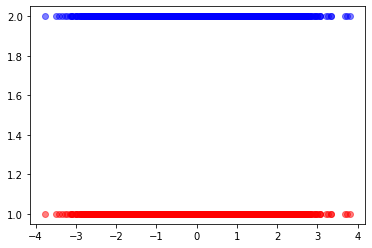

In [3]:
x = np.array([])
y = np.array([])

mu = 0
sigma = 1
size = (num_of_points,)
noise = np.random.normal(loc=mu, scale=sigma, size=size)
x = noise[delay:]
y = noise[:-delay]

plt.scatter(x, [2]*(num_of_points-delay), alpha=0.5, c='b')
plt.scatter(y, [1]*(num_of_points-delay), alpha=0.5, c='r')

variables['normal'] = (x,y)

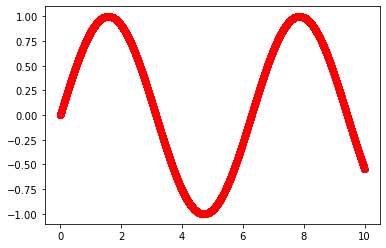

In [4]:
x = np.array([])
y = np.array([])

linspace = np.linspace(0, 10, num_of_points)
sin_points = np.sin(linspace)
x = sin_points[delay:]
y = sin_points[:-delay]

plt.scatter(linspace[delay:], x, alpha=0.5, c='b')
plt.scatter(linspace[:-delay], y, alpha=0.5, c='r')

variables['sin'] = (x,y)

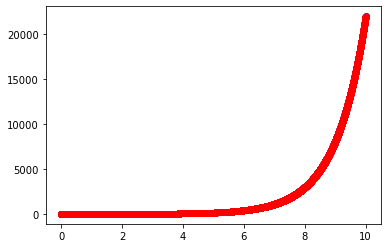

In [5]:
x = np.array([])
y = np.array([])

linspace = np.linspace(0, 10, num_of_points)
exp_points = np.exp(linspace)
x = exp_points[delay:]
y = exp_points[:-delay]

plt.scatter(linspace[delay:], x, alpha=0.5, c='b')
plt.scatter(linspace[:-delay], y, alpha=0.5, c='r')

variables['exp'] = (x,y)

In [6]:
print('\n')
print('delay:', delay)
print('num_of_points', num_of_points)
print('\n')

for variable_source in variables.keys():
    x, y = variables[variable_source]

    transfer_entropy = TransferEntropy()

    print('variables_source:', variable_source, '\n')

    print('transfer_entropy(x,y):')
    print(transfer_entropy.get_transfer_entropy(x,y), '\n')
    print('transfer_entropy(y,x):')
    print(transfer_entropy.get_transfer_entropy(y,x), '\n')
    print('\n')



delay: 1
num_of_points 10000


variables_source: normal 

transfer_entropy(x,y):
5.815709622702947e-05 

transfer_entropy(y,x):
1.0234242718620834e-05 



variables_source: sin 

transfer_entropy(x,y):
3.78325407965896e-05 

transfer_entropy(y,x):
3.473848477930641e-05 



variables_source: exp 

transfer_entropy(x,y):
0.00030021304184302267 

transfer_entropy(y,x):
0.0002961854377749873 





In [7]:
# from TransferEntropy.transfer_entropy import TransferEntropy

# sum_xy_te = 0
# sum_yx_te = 0

# reps = 1000

# for i in range(reps):
#     num_of_points = 1000
#     num_samples = 2
#     shift = 1

#     x_mu = 0
#     x_sigma = 1
#     x_size = (num_of_points,)
#     x = np.random.normal(loc=x_mu, scale=x_sigma, size=x_size)

#     ksi_mu = 0
#     ksi_sigma = 0.1
#     ksi_size = (num_of_points,)
#     ksi = np.random.normal(loc=ksi_mu, scale=ksi_sigma, size=ksi_size)


#     num_of_points -= shift

#     y = x[:num_of_points] + ksi[:num_of_points]
#     x = x[shift:]

#     x = x[len(x)-num_samples:]
#     y = y[len(y)-num_samples:]


#     transfer_entropy = TransferEntropy()

#     xy_te = transfer_entropy.get_transfer_entropy(x,y)
#     yx_te = transfer_entropy.get_transfer_entropy(y,x)

#     # print('TransferEntropy(x,y) =', xy_te)
#     # print('TransferEntropy(y,x) =', yx_te)

#     sum_xy_te += xy_te
#     sum_yx_te += yx_te

# mean_xy_te = sum_xy_te / reps
# mean_yx_te = sum_yx_te / reps

# print('MeanTransferEntropy(x,y) =', mean_xy_te)
# print('MeanTransferEntropy(y,x) =', mean_yx_te)





In [12]:
def test_transfer_entropy():
    num_samples = 1000
    num_points = 2 #y2, y1

    x_mu = 0
    x_sigma = 1
    x_size = (num_samples,)
    x = [np.random.normal(loc=x_mu, scale=x_sigma, size=x_size) for _ in range(num_points)]

    ksi_mu = 0
    ksi_sigma = 0.1
    ksi_size = (num_samples,)
    ksi = [np.random.normal(loc=ksi_mu, scale=ksi_sigma, size=ksi_size) for _ in range(num_points)]

    # num_of_points -= shift
    
    # y2 = x[0] + ksi[1]
    # x1 = x[0]

    x = np.array(x).reshape(2,)
    y = np.array([0, x[1]])
    print(x.shape)
    # x = x[len(x)-num_samples:]
    # y = y[len(y)-num_samples:]


    transfer_entropy = TransferEntropy()

    xy_te = transfer_entropy.get_transfer_entropy(x,y)
    yx_te = transfer_entropy.get_transfer_entropy(y,x)
    print(xy_te, yx_te)

In [13]:
test_transfer_entropy()

ValueError: cannot reshape array of size 2000 into shape (2,)

In [ ]:
len(x[len(x)-2:])

2

In [ ]:
a = np.array([1,2,34])

In [ ]:
a[len(a)-1:]

array([34])

In [1]:
names = ['guy', 'ido', 'sagi', 'shahar', 'tom', 'yair', 'yoav']
sharon_names = ['guy', 'sagi', 'tom', 'yoav']
other = ['ido', 'yair', 'shahar']
import random
random.choice(sharon_names)

'guy'

In [21]:
random.choice(other)

'shahar'

In [2]:
import numpy as np
import random
from TransferEntropy.transfer_entropy import EEC
random.seed(0)

n = 10000
x = np.random.normal(loc=0, scale=1, size=n+1)
x0 = x[1:n]
x1 = x[2:n+1]

ksi = np.random.normal(loc=0, scale=0.1, size=n+1)
y1 = x0 + ksi[1:n]
y2 = x1 + ksi[2:n+1]


t3 = np.array([y2, y1, x1]).T
e1 = EEC(np.array([y1, y2]).T)
e2 = EEC(np.array([y1]).T)
e3 = EEC(np.array([y2, y1, x1]).T)
e4 = EEC(np.array([y1, x1]).T)

print(e1, e2, e3, e4, e1-e2-e3+e4)

# EEC(np.array([y2, x1]).T)


2.7465536553255876 1.3732612834860671 1.8058042505116383 2.74021367324372 2.307701794571602


In [3]:
import numpy as np
import random
from TransferEntropy.transfer_entropy import EEC
random.seed(0)

n = 10000
x0 = np.random.normal(loc=0, scale=1, size=n)
x1 = np.random.normal(loc=0, scale=1, size=n)

# ksi = np.random.normal(loc=0, scale=0.1, size=n)
y1 = x0 + np.random.normal(loc=0, scale=0.1, size=n)
y2 = x1 + np.random.normal(loc=0, scale=0.1, size=n)


t3 = np.array([y2, y1, x1]).T
e1 = EEC(np.array([y1, y2]).T)
e2 = EEC(np.array([y1]).T)
e3 = EEC(np.array([y2, y1, x1]).T)
e4 = EEC(np.array([y1, x1]).T)

print(e1, e2, e3, e4, e1-e2-e3+e4)

EEC(np.array([y2, x1]).T)


2.7584602953800372 1.3773425088719276 1.8127625177351572 2.752756277183406 2.3211115459563585


0.43500528459480803

In [4]:
EEC(np.array([y1, y2]).T)

2.7584602953800372

In [48]:
import pandas as pd
# df3 = pd.DataFrame(t3)
# df3.to_csv("random_numbers_from_the_book.csv")

df5 = pd.DataFrame(np.array([x,ksi]).T)
df5.to_csv("x_and_ksi.csv")

In [53]:
np.array([y1, y2]).T

array([[ 0.24893001, -0.91106307],
       [-0.91106307, -0.39071815],
       [-0.39071815,  0.73929956],
       ...,
       [-1.0084441 ,  0.59764074],
       [ 0.59764074,  0.45411328],
       [ 0.45411328,  0.62171499]])

In [47]:
df5.shape
# np.array([y1, y2]).T

(2, 1001)

In [35]:
x = np.random.normal(loc=0, scale=1, size=n)
y = x + 0.5*np.random.normal(loc=0,scale=1, size=n)
z = x + y + 0.5*np.random.normal(loc=0, scale=1, size=n)
EEC(np.array([x,y,z]).T)

2.7951654932190273

In [25]:
import numpy as np
a = np.array([0,0,0])
np.all( a == 0)


True

In [26]:

np.all(a == 0)

True

In [12]:
from tqdm import tqdm
for i in enumerate(tqdm(range(10000000))):
    pass

100%|██████████| 10000000/10000000 [00:01<00:00, 7596626.28it/s]
